# The Airy function Riemann-Hilbert problem

In [21]:
using ApproxFun, SpecialFunctions, SingularIntegralEquations, RiemannHilbert, Plots

Consider the Airy equation __[DLMF Sec. 9]__ $\newcommand{\Ai}{\mathrm{Ai}}$$\newcommand{\mf}{\mathfrak} \newcommand{\E}{\mathrm{e}} \newcommand{\I}{\mathrm{i}} \newcommand{\mf}{\mathfrak}$ $\DeclareMathOperator{\arg}{arg}$
$$
Y''(z) = z Y(z).
$$
The canonical particular solution satisfies
$$
\Ai(z) \sim \frac{1}{2 \sqrt{\pi}} z^{-1/4} \E^{-\frac 2 3 z^{3/2}}, \quad - \frac {2\pi}{3} \leq \mathrm{arg}\, z \le \frac{2\pi}{3}.
$$

Define $\omega = \E^{- \frac {2 \I \pi}{3}}$ and
\begin{align*}
    y(z) = \begin{cases} \begin{bmatrix} - \omega \Ai(\omega z) & - \I \omega^2 \Ai(\omega^2 z) \end{bmatrix} & - \pi < \arg z < - \frac{2\pi}{3}, \\
    \begin{bmatrix} \Ai(z) & - \I \omega^2 \Ai(\omega^2 z) \end{bmatrix} & - \frac{2 \pi}{3} < \arg z < 0,\\
    \begin{bmatrix} \Ai(z) & \I \omega \Ai(\omega z) \end{bmatrix} & 0 < \arg z < \frac{2\pi}{3},\\
    \begin{bmatrix} - \omega^2 \Ai(\omega^2 z) & \I \omega \Ai(\omega z) \end{bmatrix}  & \frac{2\pi}{3} < \arg z < \pi.
    \end{cases}
\end{align*}

Using the fact that $\Ai(z) + \omega\Ai(\omega z) + \omega^2\Ai(\omega^2 z) = 0$, it follows that $y$ has the following jump conditions
\begin{align*}
y^+(s) &= y^-(s) \begin{bmatrix} 1 & -\I \\ 0 & 1 \end{bmatrix} \quad s \in (0,\infty),\\
y^+(s) &= y^-(s) \begin{bmatrix} 1 & 0 \\ -\I & 1 \end{bmatrix} \quad s \in (0,\omega^{-1}\infty),\\
y^+(s) &= y^-(s) \begin{bmatrix} 1 & 0 \\ -\I & 1 \end{bmatrix} \quad s \in (0,\omega\infty),\\
y^+(s) &= y^-(s) \begin{bmatrix} 0 & -\I \\ -\I & 0 \end{bmatrix} \quad s \in (-\infty,0).
\end{align*}

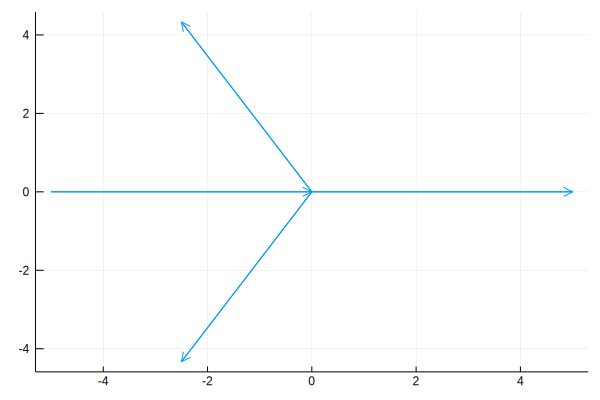

In [22]:
ω = exp(-2im*pi/3); ωi = exp(2im*pi/3);
Γ₀ = Segment(0.,5) ∪ Segment(0,5ωi) ∪ Segment(0,5ω) ∪ Segment(-5,0)
plot(Γ₀, arrow=:arrow, legend=false)

This setup has two related problems:
* The jump matrices do not tend to the identity matrix at infinity.
* The asymptotics of $y$ at infinity is not, to leading order, constant.

To fix some of these issues, define
\begin{align*}
\phi(z) = 2 \sqrt \pi z^{1/4} y(z) \begin{bmatrix} \E^{\frac{2}{3} z^{3/2}} & 0 \\ 0 & \E^{-\frac{2}{3} z^{3/2} }\end{bmatrix}.
\end{align*}

Then
\begin{align*}
\phi^+(s) &= \phi^-(s) \begin{bmatrix} 1 & -\I \E^{- \frac 4 3 s^{3/2}} \\ 0 & 1 \end{bmatrix} \quad s \in (0,\infty),\\
\phi^+(s) &= \phi^-(s) \begin{bmatrix} 1 & 0 \\ -\I\E^{ \frac 4 3 s^{3/2}} & 1 \end{bmatrix} \quad s \in (0,\omega^{-1}\infty),\\
\phi^+(s) &= \phi^-(s) \begin{bmatrix} 1 & 0 \\ -\I\E^{- \frac 4 3 s^{3/2}} & 1 \end{bmatrix} \quad s \in (0,\omega\infty),\\
\phi^+(s) &= \phi^-(s) \begin{bmatrix} 0 & -\I \\ -\I & 0 \end{bmatrix} \quad s \in (-\infty,0).
\end{align*}

And
\begin{align*}
\phi(z) \sim \begin{bmatrix} 1 & 1 \end{bmatrix}, \quad z \to \infty.
\end{align*}

We solved some of the problems with the jumps but we have an additional (major) problem:
* Since $y(z)$ is analytically extendible beyond each sector, $\phi(z)$ must be singular at $z = 0$.

To fix this, set
\begin{align*}
    J_1 = \begin{bmatrix} 1 & 0 \\ -\I & 1 \end{bmatrix}, \quad J_2 = \begin{bmatrix} 1 & -\I \\ 0 & 1 \end{bmatrix}.
\end{align*}

Instead of considering $\phi$, first consider $y_1$ defined as follows

<center>![title](y1.png)</center>

$y_1 = y$ outside this circle.

And set
\begin{align*}
    \phi_1(z) = y_1(z) \begin{cases} 
    R(z) & |z| > 1 \\ \\
    I & |z| \leq 1, \end{cases}
\end{align*}
where
\begin{align*}
R(z) = z^{1/4} \begin{bmatrix} \E^{\frac 2 3 z^{3/2}} & 0 \\ 0 & \E^{- \frac 2 3 z^{3/2}} \end{bmatrix} \begin{bmatrix} 1 & 1 - \frac{1}{\sqrt{z}} \\ 1 & 1 + \frac{1}{\sqrt{z}} \end{bmatrix}.
\end{align*}

<center>![title](airy_rhp.png)</center>

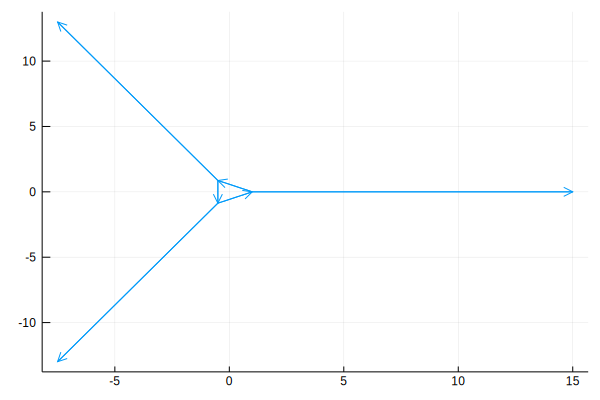

In [23]:
r = 1.
L = 15.
Γ = Segment(r, L) ∪
    Segment(r*ωi, L*ωi) ∪
    Segment(r*ω, L*ω) ∪
    Segment(r, r*ωi) ∪
    Segment(r*ωi, r*ω) ∪
    Segment(r*ω, r)
plot(Γ, arrow=:arrow, legend = false)

In [24]:
ϵ = 2.2e-16
H(z) = 0.5*[1 (1 - 1/sqrt(z));
            1 (1 + 1/sqrt(z))]
H(z,s) = H(z + s*1im*ϵ)
Hi(z) = inv(H(z))
Hi(z,s) = inv(H(z,s))
R(z) = 2*sqrt(π)*z^(1/4)*[exp(2/3*z^(3/2)) 0.;
                        0.  exp(-2/3*z^(3/2))]*H(z)
R(z,s) = R(z + s*1im*ϵ)
Ri(z) = 1/(2*sqrt(π))*z^(-1/4)*Hi(z)*[exp(-2/3*z^(3/2)) 0.0;
                        0.0  exp(2/3*z^(3/2))]
Ri(z,s) = Ri(z + s*1im*ϵ)

J1 = [1 0; -1im 1]
J2 = [1 -1im; 0 1]
G0 = z -> if angle(z) ≈ 0
        Ri(z,1)*J2*R(z,1)
      elseif angle(z) ≈ 2π/3
        Ri(z,1)*J1*R(z,1)
      elseif angle(z) ≈ -2π/3
        Ri(z,1)*J1*R(z,1)
     end
G1 = z -> Ri(z,1)*J1
G2 = z -> imag(z) >= 0. ? Ri(z,1) : Ri(z,1)*J1*J2*J1
G3 = z -> Ri(z,1)*J2*J1;

Set up Riemann-Hilbert problem

In [25]:
rhp = Fun(function(z)
        z ∈ component(Γ,1) && return G0(z)
        z ∈ component(Γ,2) && return G0(z)
        z ∈ component(Γ,3) && return G0(z)
        z ∈ component(Γ,4) && return G1(z)
        z ∈ component(Γ,5) && return G2(z)
        z ∈ component(Γ,6) && return G3(z)
        error("Not in contour") 
    end, Γ);

Check product condition at $ω r, \omega^{-1} r, r,ω L, \omega^{-1} L, L$ and solve

In [26]:
for ℓ in [r,L]
    for z in [ω,ωi,1]*ℓ
        print(RiemannHilbert.productcondition(rhp,z) ≈ [1 0; 0 1]," ")
    end
end

true true true true true true 

In [27]:
Φ = transpose(rhsolve(transpose(rhp),6*120));
Φ = Φ[1,:] + Φ[2,:];

In [28]:
Q = z -> if 0 < angle(z) < 2π/3
        inv(J1)
     elseif 2π/3 < angle(z) <= π
        [1. 0im; 0im 1.]
     elseif -π < angle(z) < -2π/3
        inv(J1*J2*J1)
     elseif -2π/3 <= angle(z) <= 0
        inv(J2*J1)
     end
P = z -> if real(z) >= -r*cos(π/3) && imag(z*exp(1im*π/3)) <= r*cos(pi/3) && imag(z*exp(-1im*π/3)) >= -r*cos(pi/3) 
    Q(z)
    else 
    Ri(z,1)
    end
y = z -> transpose(Φ(z))*P(z);
Airy = z -> if -2π/3 <= angle(z) <= 2π/3
        y(z + 1im*ϵ)[1]
     elseif 2π/3 < angle(z) <= π
        yy = y(z + (1im-1)*ϵ)
        yy[1] + 1im*yy[2]
     else
        yy = y(z - (1im+1)*ϵ)
        yy[1] - 1im*yy[2]
    end;

In [29]:
z = 1im; abs((Airy(z) - airyai(z))/airyai(z))

8.55208292594855e-16

In [30]:
z = -100-1im; abs((Airy(z) - airyai(z))/airyai(z))

2.070721306648171e-13